### The Impact of Large Sample Sizes

When we increase our sample size, even the smallest of differences may seem significant.  

To illustrate this point, work through this notebook and the quiz questions that follow below.

Start by reading in the libraries and data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
full_data.head(5)

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


`1.` In this case, imagine we are interested in testing if the mean height of all individuals in `full_data` is equal to 67.60 inches or **different** than 67.60.  First, use **quiz 1** below to state the null and alternative hypotheses for these cases in the cell below. 

`2.` Find:
* What is the population mean height?  
* What is the standard deviation of the population heights?  Create a sample set of data using the code below.  
* What is the sample mean height?  Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram. 
* What is the standard deviation of the sampling distribution of the mean of five draws? 
Use **quiz 2** below to assure your answers are correct.  

In [2]:
pop_height = full_data['height'].mean()
pop_height

67.597486973079342

In [3]:
sample1 = full_data.sample(5)

(array([   40.,   184.,   787.,  1496.,  2273.,  2369.,  1625.,   809.,
          359.,    58.]),
 array([ 64.3571538 ,  65.05835045,  65.75954709,  66.46074374,
         67.16194038,  67.86313703,  68.56433367,  69.26553032,
         69.96672696,  70.66792361,  71.36912025]),
 <a list of 10 Patch objects>)

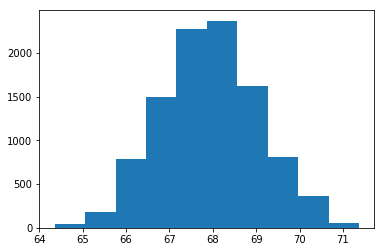

In [4]:
#Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram. 
mean_height_5 = []
for _ in range(10000):
    bootsamp = sample1.sample(5, replace = True)
    mean_height_5.append(bootsamp.height.mean())
plt.hist(mean_height_5)

#The shape seems normally distributed, mean sample height in the plot is 68
#population height is 67, that doesn't match with sample meant height with 5 drow

In [5]:
#What is the standard deviation of the sampling distribution of the mean of five draws?
std_mean_height_5 = np.std(mean_height_5)
std_mean_height_5

1.141357351999374

In [6]:
#sample mean height
sample_mean_height = np.array(mean_height_5).mean()
sample_mean_height

67.902914964404943

In [7]:
#we can see std of full data height is double of sample mean height std.
#population height's standard deviation
np.std(full_data.height)

3.1189087116821459

`3.` Using the null and alternative hypotheses set up in question 1 and the results of your sampling distribution in question 2, simulate the mean values you would expect from the null hypothesis.  Use these simulated values to determine a p-value to make a decision about your null and alternative hypotheses.  



(array([    8.,    91.,   540.,  1624.,  2975.,  2815.,  1474.,   400.,
           67.,     6.]),
 array([ 63.07842203,  63.99847361,  64.91852518,  65.83857676,
         66.75862833,  67.67867991,  68.59873148,  69.51878305,
         70.43883463,  71.3588862 ,  72.27893778]),
 <a list of 10 Patch objects>)

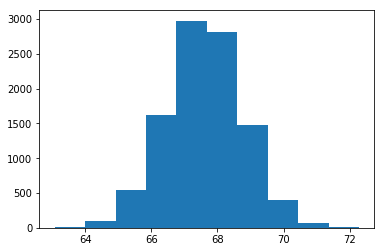

In [8]:
#H0: mu(height) = 67.60
#H1: mu(height) (different than) 67.60
null_values = np.random.normal(67.60, np.std(mean_height_5), 10000)
plt.hist(null_values)

In [15]:
#calculation of p values for H0: mu(height) = 67.60,H1: mu(height) (different than) 67.60
obs_mean = sample1.height.mean()
null_mean = 67.60
# probability of a statistic higher than observed
prob_more_extreme_high = (null_values > obs_mean).mean()
    
# probability a statistic is more extreme lower
prob_more_extreme_low = (null_mean - (obs_mean - null_mean) > null_values).mean()

pval = prob_more_extreme_low + prob_more_extreme_high
pval

0.80499999999999994

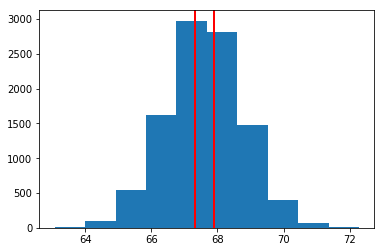

In [16]:
#showing the pavalues in the plot
low = obs_mean
heigh = null_mean+(null_mean - obs_mean)
plt.hist(null_values)
plt.axvline(low, color = 'r', linewidth = 2)
plt.axvline(heigh, color = 'r', linewidth = 2)

In [ ]:
#from the plot our redline is between 66.5-66.9, that shows our null ypotheseis is correct and we cann't reject null hypothesis.

`4.` Now imagine if you received the same sample mean as you calculated from the sample in question 1 above, but that you actually retrieved it from a sample of 300.  What would the new standard deviation be for your sampling distribution for the mean of 300 values?  Additionally, what would your new p-value be for choosing between the null and alternative hypotheses you set up? Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram.  Use your solutions here to answer the second to last quiz question below.



In [17]:
#sampling  to retive 300 values from the population
sample2 = full_data.sample(300)
sample_mean_300 = []
for _ in range(10000):
    bootsamp2 = sample2.sample(300, replace = True)
    sample_mean_300.append(bootsamp2.height.mean())


In [18]:
# What would the new standard deviation be for your sampling distribution for the mean of 300 values?
std_300 = np.std(np.array(sample_mean_300))
std_300

0.18108485974118899

In [55]:
sample_mean= np.mean(np.array(sample_mean_300))
sample_mean

67.68782648802879

(array([   12.,   110.,   633.,  1928.,  3033.,  2567.,  1296.,   365.,
           50.,     6.]),
 array([ 66.93380742,  67.0732858 ,  67.21276419,  67.35224258,
         67.49172097,  67.63119936,  67.77067775,  67.91015613,
         68.04963452,  68.18911291,  68.3285913 ]),
 <a list of 10 Patch objects>)

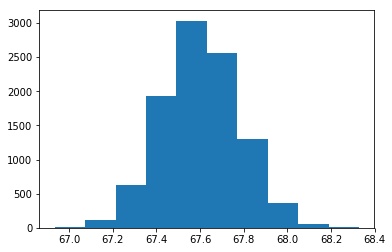

In [20]:
null_values_300 = np.random.normal(67.60, std_300, 10000)
plt.hist(null_values_300)

In [23]:
obs_mean = sample2.height.mean() #sample mean for 300 drow
null_mean = 67.60
#calculating p value, H0: mu = 67.60, H1: mu != 67.60
# probability of a statistic higher than observed
prob_more_extreme_high = (null_values_300 > obs_mean).mean()
    
# probability a statistic is more extreme lower
prob_more_extreme_low = (null_mean - (obs_mean - null_mean) > null_values_300).mean()

pval = prob_more_extreme_low + prob_more_extreme_high
pval

0.61370000000000002

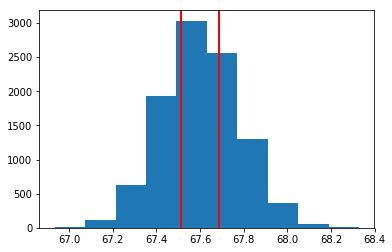

In [24]:
#plotting the graph to see where our p values fall
upperbond = obs_mean
lowerbond= null_mean+(null_mean-obs_mean)
plt.hist(null_values_300)
plt.axvline(lowerbond, color = 'r', linewidth = 2)
plt.axvline(upperbond, color = 'r', linewidth = 2)
plt.show()

In [25]:
print(lowerbond, upperbond)

67.688767951 67.511232049


`5.` Reflect on what happened by answering the final quiz in this concept.

In [ ]:
#our null value is 0.8286, for larger vlaues of p , we don't have evidence to reject the null hypothesis.